In [1]:
import predict
import cv2
import numpy
from matplotlib import pyplot as plt
import math
from map import Map

model_name = "../resource/v7-LandCover-retrained-twice"


map = Map(0, 100, 0, 100, "kaka_input.tif")

polygons = [
    ((10, 10), (10,20), (40, 10)),
    ((35, 35), (45, 45), (35, 55), (25, 45))
]

map_grid_cell_size = (10, 10)


2023-06-15 20:49:09.964226: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-06-15 20:49:10.475992: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-06-15 20:49:10.476063: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-06-15 20:49:10.476068: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


2023-06-15 20:49:11.536324: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/karpase/.local/lib/python3.10/site-packages/cv2/../../lib64:
2023-06-15 20:49:11.536378: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


## Load the NN model

In [2]:
model = predict.load_model(model_name)


## Show the map

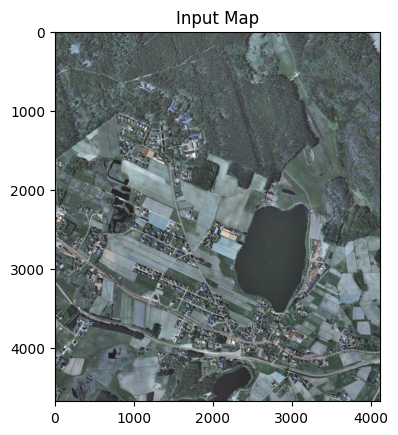

In [3]:
plt.title('Input Map')
plt.imshow(map.image)

## Predict the cover labels


In [4]:
pred = predict.image_to_pixel_cover(model, map.image)
map_pred = Map(0, 100, 0, 100, pred)


Splitting files into  /tmp/tmpyklo7p1f
3/3 [==============================] - 5s 1s/step


## Show the cover labels


* black - Background
* red - building
* green - woodland
* blue - water
* white - road


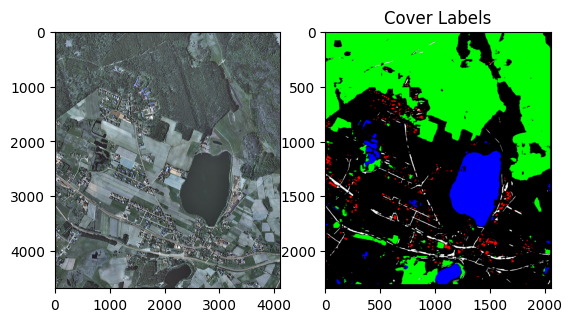

In [5]:
fig, (m1, m2) = plt.subplots(1,2)
plt.title('Cover Labels')
m1.imshow(map.image)
m2.imshow(map_pred.colormap())


## Add the Polygons to the Cover Labels

Each polygon gets a unique color


Text(0.5, 1.0, 'Map with Polygons')

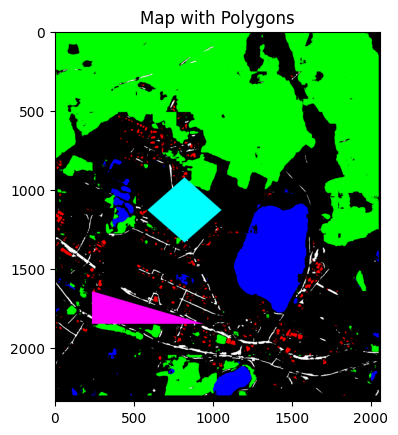

In [6]:
polygon_id = predict.NUM_CLASSES + 1

for p in polygons:     
    map_pred.color_polygon(p, polygon_id)   
    polygon_id = polygon_id + 1


plt.imshow(map_pred.colormap())
plt.title('Map with Polygons')    



## Overlay a Grid


In [7]:
grid = map_pred.to_grid(map_grid_cell_size[0], map_grid_cell_size[1])

print(grid)

# for i,j in grid:
#     x1, y1, x2, y2, histogram = grid[i,j]
#     amax = numpy.argmax(histogram)
#     color = int(amax)    
#     cv2.rectangle(pred, (x1, y1), (x2, y2), 255, 5)
#     cv2.putText(pred, str(i) + "," + str(j), (x1, round(y1+y2/2)), cv2.FONT_HERSHEY_PLAIN, 5, 255, 5, cv2.LINE_AA)


# plt.imshow(map_pred.colormap())
# plt.title('Map with Grid')   


(2339, 2056)
{(0, 0): (0, 0, 206, 234, array([0.10399552, 0.        , 0.89600448, 0.        , 0.        ,
       0.        ])), (1, 0): (206, 0, 412, 234, array([1.94589661e-02, 0.00000000e+00, 9.80478798e-01, 0.00000000e+00,
       6.22354991e-05, 0.00000000e+00])), (2, 0): (412, 0, 618, 234, array([6.28578541e-03, 0.00000000e+00, 9.93423782e-01, 0.00000000e+00,
       2.90432329e-04, 0.00000000e+00])), (3, 0): (618, 0, 824, 234, array([0.00686665, 0.        , 0.98885985, 0.        , 0.0042735 ,
       0.        ])), (4, 0): (824, 0, 1030, 234, array([0.00499959, 0.        , 0.97908887, 0.        , 0.01591154,
       0.        ])), (5, 0): (1030, 0, 1236, 234, array([0.11401543, 0.        , 0.88598457, 0.        , 0.        ,
       0.        ])), (6, 0): (1236, 0, 1442, 234, array([0.80677952, 0.        , 0.19322048, 0.        , 0.        ,
       0.        ])), (7, 0): (1442, 0, 1648, 234, array([0.28391835, 0.        , 0.71608165, 0.        , 0.        ,
       0.        ])), (8, 0

IndexError: index 255 is out of bounds for axis 0 with size 9